In [2]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
 

In [4]:
 # CSV Datei in das Programm laden
df = pd.read_csv('Datensatz.csv', parse_dates=['Datum'])
print(df)

          Datum         Open        Close  Arbeitslosenquote  \
0    2012-01-02  5900.180176  6075.520020                7.3   
1    2012-01-03  6124.109863  6166.569824                7.3   
2    2012-01-04  6141.259766  6111.549805                7.3   
3    2012-01-05  6121.339844  6095.990234                7.3   
4    2012-01-06  6114.640137  6057.919922                7.3   
...         ...          ...          ...                ...   
2968        NaT          NaN          NaN                NaN   
2969        NaT          NaN          NaN                NaN   
2970        NaT          NaN          NaN                NaN   
2971        NaT          NaN          NaN                NaN   
2972        NaT          NaN          NaN                NaN   

      Verbraucherpreisindex  Leitzins  Wechselkurs EUR/USD CompanyName  \
0                      90.6      0.25             1.296008         DAX   
1                      90.6      0.25             1.294096         DAX   
2        

In [5]:
def load_data(company, start, end):
     #Alle Daten werden eingeladen
     #Company: in unserem Fall der DAX
     #Start: Das Startdatum des zu betrachtenden Datensatzes
     #End das Enddatum des zu betrachtenden Datensatzes
     #return: Ein Pandas Datenframe, welches alle Daten enthält
    
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.CompanyName == company, :]
    dataframe = dataframe.loc[(dataframe['Datum'] > start) & (dataframe['Datum'] < end), :]
    

  
    return dataframe
 

In [6]:
COMPANY = 'DAX'
START_DATE = dt.datetime(2012,1,1)
END_DATE = dt.datetime(2023,9,1)

START_DATE_TEST = END_DATE


In [7]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

print (data)

          Datum          Open         Close  Arbeitslosenquote  \
0    2012-01-02   5900.180176   6075.520020                7.3   
1    2012-01-03   6124.109863   6166.569824                7.3   
2    2012-01-04   6141.259766   6111.549805                7.3   
3    2012-01-05   6121.339844   6095.990234                7.3   
4    2012-01-06   6114.640137   6057.919922                7.3   
...         ...           ...           ...                ...   
2951 2023-08-25  15582.950195  15631.820313                5.8   
2952 2023-08-28  15756.469727  15792.610352                5.8   
2953 2023-08-29  15844.759766  15930.879883                5.8   
2954 2023-08-30  15956.919922  15891.929688                5.8   
2955 2023-08-31  15937.389648  15947.080078                5.8   

      Verbraucherpreisindex  Leitzins  Wechselkurs EUR/USD CompanyName  \
0                      90.6      0.25             1.296008         DAX   
1                      90.6      0.25             1.294096 

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time

 

# Wählen Sie nur die numerischen Spalten aus
numeric_features = ["Open", "Close", "Arbeitslosenquote", "Verbraucherpreisindex", "Leitzins", "Wechselkurs EUR/USD"]

# Extrahieren Sie nur die numerischen Daten
numeric_data = data[numeric_features].values
 

# Vorverarbeiten Sie Ihre Daten und skalieren Sie sie auf einen geeigneten Bereich
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)
 
print(scaled_data)

[[0.         0.01010634 0.96153846 0.         0.17647059 0.77603935]
 [0.02125683 0.01877746 0.96153846 0.         0.17647059 0.77162842]
 [0.02288481 0.01353763 0.96153846 0.         0.17647059 0.79817242]
 ...
 [0.94400289 0.94868075 0.38461538 1.         1.         0.28361198]
 [0.95464985 0.94497133 0.38461538 1.         1.         0.2936819 ]
 [0.95279591 0.95022357 0.38461538 1.         1.         0.30829425]]


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import time

# Hyperparameter for the DRL model
num_episodes = 25
batch_size = 64
look_back=1
features = ["Open", "Close", "Arbeitslosenquote", "Verbraucherpreisindex", "Leitzins", "Wechselkurs EUR/USD"]

# Function to create the DRL model
def create_drl_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(look_back, len(features)), return_sequences=True))
    model.add(LSTM(20, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the DRL model
drl_model = create_drl_model()

# Training the DRL model
start_time = time.time()

total_loss = 0.0  # Initialize total loss
for episode in range(num_episodes):
    for i in range(look_back, len(scaled_data)):
        X = scaled_data[i-look_back:i]
        y = scaled_data[i][1]  # Use index 1 to get the "Close" value
        history = drl_model.fit(np.array([X]), np.array([y]), epochs=1, batch_size=batch_size, verbose=0)
        total_loss += history.history['loss'][0]  # Accumulate the loss
        if i % 100 == 0:
            print(f"Episode {episode}, Iteration {i}")  # Print average loss , Loss: {total_loss / (i - look_back + 1)}
    elapsed_time = time.time() - start_time
    if episode % 1 == 0:
        print(f"Episode {episode}")
        print(f"Elapsed Time: {elapsed_time} seconds")
        print(f"Average Loss for Episode {episode}: {total_loss / (len(scaled_data) - look_back)}")

end_time = time.time()
training_time = end_time - start_time


Episode 0, Iteration 100
Episode 0, Iteration 200
Episode 0, Iteration 300
Episode 0, Iteration 400
Episode 0, Iteration 500
Episode 0, Iteration 600
Episode 0, Iteration 700
Episode 0, Iteration 800
Episode 0, Iteration 900
Episode 0, Iteration 1000
Episode 0, Iteration 1100
Episode 0, Iteration 1200
Episode 0, Iteration 1300
Episode 0, Iteration 1400
Episode 0, Iteration 1500
Episode 0, Iteration 1600
Episode 0, Iteration 1700
Episode 0, Iteration 1800
Episode 0, Iteration 1900
Episode 0, Iteration 2000
Episode 0, Iteration 2100
Episode 0, Iteration 2200
Episode 0, Iteration 2300
Episode 0, Iteration 2400
Episode 0, Iteration 2500
Episode 0, Iteration 2600
Episode 0, Iteration 2700
Episode 0, Iteration 2800
Episode 0, Iteration 2900
Episode 0
Elapsed Time: 140.46450543403625 seconds
Average Loss for Episode 0: 0.0010425843944440088
Episode 1, Iteration 100
Episode 1, Iteration 200
Episode 1, Iteration 300
Episode 1, Iteration 400
Episode 1, Iteration 500
Episode 1, Iteration 600
Epis

In [10]:
# Define the date ranges
start_date_training = "2012-01-02"
end_date_training = "2023-07-31"
start_date_testing = "2023-08-01"
end_date_testing = "2023-08-31"

# Filter data for training and testing
training_data = df[(df['Datum'] >= start_date_training) & (df['Datum'] <= end_date_training)]
testing_data = df[(df['Datum'] >= start_date_testing) & (df['Datum'] <= end_date_testing)]
actual_prices = testing_data["Close"].values
# Scale the testing data
scaler = MinMaxScaler()
scaled_testing_data = scaler.fit_transform(testing_data[features])

# Initialize an array to store predictions
Predictions = []


# Generate predictions for the testing data
for i in range(look_back, len(scaled_testing_data)):
    X = scaled_testing_data[:i]  # Use all available historical data up to day i
    y_pred = drl_model.predict(np.array([X]))  # Make predictions
    print(y_pred[0][0])
    print(i)
    Predictions.append(y_pred[0][0])  # Append the prediction to the array


# Convert Predictions to a NumPy array
 

# Optionally, you can inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(Predictions.reshape(-1, 1))

print(Predictions)

1/1 [==============================] - 2s 2s/step
0.7863963
1
1/1 [==============================] - 1s 604ms/step
0.8362622
2
1/1 [==============================] - 0s 18ms/step
0.64344954
3
1/1 [==============================] - 0s 20ms/step
0.45481926
4
1/1 [==============================] - 0s 19ms/step
0.245853
5
1/1 [==============================] - 0s 26ms/step
0.005638361
6
1/1 [==============================] - 0s 19ms/step
-0.121272326
7
1/1 [==============================] - 0s 21ms/step
-0.17558682
8
1/1 [==============================] - 0s 20ms/step
-0.23522985
9
1/1 [==============================] - 0s 19ms/step
-0.26982254
10
1/1 [==============================] - 0s 19ms/step
-0.29793906
11
1/1 [==============================] - 0s 24ms/step
-0.32769477
12
1/1 [==============================] - 0s 19ms/step
-0.35998034
13
1/1 [==============================] - 0s 21ms/step
-0.4183839
14
1/1 [==============================] - 0s 23ms/step
-0.44125563
15
1/1 [=========

AttributeError: 'list' object has no attribute 'reshape'

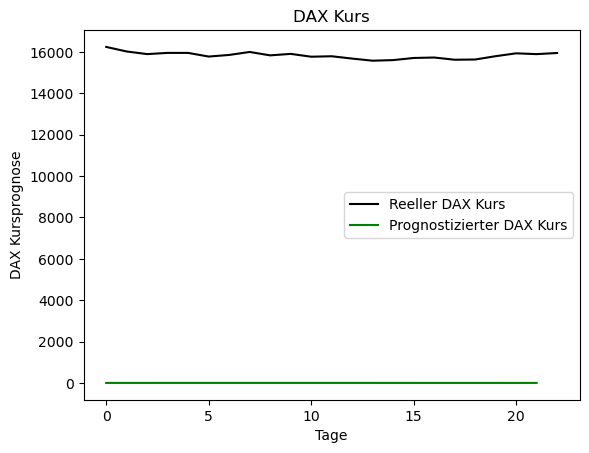

In [10]:
from datetime import datetime
subfolder = "Predictions"
#predicted_prices_original_scale = scaler.inverse_transform(Predictions.reshape(-1, len(features)))
predicted_prices=Predictions
# Wirklicher Kurs in Schwarz
plt.plot(actual_prices, color='black', label=f"Reeller {COMPANY} Kurs")

# Predictions in Grün
plt.plot(Predictions, color='green', label=f"Prognostizierter {COMPANY} Kurs")
# Holen Sie sich den aktuellen Zeitstempel für die Dateinamen
current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")

plot_image_path = os.path.join(subfolder, f"plot_{current_datetime}.png")

# Speichern Sie den Plot als Bild

plt.title(f"{COMPANY} Kurs")
plt.xlabel("Tage")
plt.ylabel(f"{COMPANY} Kursprognose")
plt.legend()
plt.savefig(plot_image_path, dpi=300, bbox_inches='tight')
plt.show()


In [26]:
import csv
import os
from datetime import datetime
from sklearn.metrics import mean_absolute_error
import numpy as np



#Anpassen der Längen
min_length = min(len(actual_prices), len(predicted_prices))
actual_prices = actual_prices[:min_length]
predicted_prices = predicted_prices[:min_length]
predicted_prices = predicted_prices.flatten()


 

#Timecode für Dateinamen
current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")

subfolder = "Predictions"
if not os.path.exists(subfolder):
    os.makedirs(subfolder)

# Einmal CSV für die Kurse und TXT für alles andere
csv_file = os.path.join(subfolder, f"prediction_{current_datetime}.csv")
txt_file = os.path.join(subfolder, f"prediction_{current_datetime}.txt")
 
data = zip(actual_prices, predicted_prices)

start_date = datetime.strptime(start_date_testing, "%Y-%m-%d")
end_date = datetime.strptime(end_date_testing, "%Y-%m-%d")

date_difference_days = (end_date - start_date).days

# Anzahl der trading days per year / Risk Free Rate
trading_days_per_year = 252
risk_free_rate = 0.03

# Rendite berechnen
actual_returns = np.diff(actual_prices) / actual_prices[:-1]
predicted_returns = np.diff(predicted_prices) / predicted_prices[:-1]


actual_returns = np.diff(actual_prices) / actual_prices[:-1]
predicted_returns = np.diff(predicted_prices) / predicted_prices[:-1]

#Berechnen von MAE
mae = mean_absolute_error(actual_prices, predicted_prices)

#Berechnen von Valitlität
volatility_actual = np.std(actual_prices)
volatility_predicted = np.std(predicted_prices)

#Berechnung der Rendite
total_return_actual = (1 + np.sum(actual_returns)) ** (trading_days_per_year / len(actual_returns)) - 1
total_return_predicted = (1 + np.sum(predicted_returns)) ** (trading_days_per_year / len(predicted_returns)) - 1

#Berechnung des Drawdowns
def calculate_drawdown(returns):
    cumulative_returns = np.cumprod(1 + returns)
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = np.min(drawdown)
    return max_drawdown

max_drawdown_actual = calculate_drawdown(actual_returns)
max_drawdown_predicted = calculate_drawdown(predicted_returns)


feature_importances = model.feature_importances_


# Normalizsieren der Gewichte
#normalized_weights = np.abs(input_weights) / np.sum(np.abs(input_weights))
 
existing_data = []
if os.path.isfile(csv_file):
    with open(csv_file, mode='r', newline='') as file:
        reader = csv.reader(file)
        existing_data = [row for row in reader]
 
existing_data = [list(row) for row in existing_data]

# Differenz der beiden kalkulieren
for row in existing_data:
    try:
        a = float(row[0])   
        b = float(row[1])  
        diff = a - b        
        row.append(diff)    
    except ValueError:
        row.append("")      

 
for row in data:
    try:
        a = float(row[0])    
        b = float(row[1])   
        diff = a - b       
        row = list(row)    
        row.append(diff)    
        existing_data.append(row)   
    except ValueError:
        pass  # 

 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
     
    writer.writerow(['Actual Price', 'Predicted Price', 'Differenz'])
    
     
    writer.writerows(existing_data)
    

with open(txt_file, mode='w') as txt_file:
    txt_file.write(f'n_estimators: {count_n_estimators}\n')
    txt_file.write(f'n_random_states: {count_n_random_states}\n')
    txt_file.write(f'n_max_depth: {count_n_max_depth}\n') 
    txt_file.write(f'prediction_days: {prediction_days}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'start: {start_date_testing}\n')
    txt_file.write(f'end: {end_date_testing}\n')
    txt_file.write(f'Date Difference (Days): {date_difference_days}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'MAE: {mae}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Volatility of Actual Prices: {volatility_actual}\n')
    txt_file.write(f'Volatility of Predicted Prices: {volatility_predicted}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Max Drawdown of Actual Prices: {max_drawdown_actual}\n')
    txt_file.write(f'Max Drawdown of Predicted Prices: {max_drawdown_predicted}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Total Return of Actual Prices: {total_return_actual}\n')
    txt_file.write(f'Total Return of Predicted Prices: {total_return_predicted}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write("Feature Importance:\n")
    for feature_name, importance in zip(features, feature_importances):
        txt_file.write(f"{feature_name}: {importance}\n")
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Training Time (seconds): {training_time}\n')

NameError: name 'predicted_prices' is not defined